# グラフの文字で英語以外を使えるようにする

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=5d47fa9dd58ceba4d18c485511e098de53aded087841fe69ce6dd4ddba136be3
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


# 関数 save_fig：図の保存

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from datetime import datetime

def save_fig(plt, file_prefix, bbox_inches='tight'):
    if file_prefix == '':
        return

    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches=bbox_inches, pad_inches = 0.2)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches=bbox_inches, pad_inches = 0.2)

def dmcode():
    t = datetime.now().timestamp()
    buff = ['***DMCODE', str(t)]
    print(' '.join(buff))

# 関数 show_data2d：データと回帰直線を可視化する

In [ ]:
def show_data2d(x, y_true, model, labels, file_prefix=''):
    """    データと回帰直線を可視化する
    Args:
        x (ndarray): 説明変数
        y_true (ndarray): 目的変数
        model (LinearRegression): 学習済み回帰モデル
        labels (list): 説明変数と目的変数の名前
    """
    plt.figure(figsize=(6, 6))
    plt.plot(x, y_true, 'o')

    xs = np.linspace(x.min() - 0.5, x.max() + 0.5, 100)
    xs = xs.reshape(-1, 1)
    ys = model.predict(xs)
    plt.plot(xs, ys, linestyle='dashed', color='black', lw=2)

    plt.xlabel(labels[0], fontsize=14)
    plt.ylabel(labels[1], fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.tight_layout()
    save_fig(plt, file_prefix=file_prefix)
    plt.show()

# 多項式モデル用説明変数を準備する関数

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def prepare_data(x, degree):
    """多項式モデル用説明変数を準備
    Args:
        x (ndarray): 1次元配列。Nはデータ数
        degree (int): 多項式の次数

    Returns:
        x2 (ndarray): 2次元配列。形状(N, degree)。
    """
    x2 = x.reshape(-1, 1) # PolynomialFeaturesで扱うため、2次元配列(N, 1)に変形
    if degree >= 2: # 2次以上なら
        pf = PolynomialFeatures(degree=degree, include_bias=False)
        x2 = pf.fit_transform(x2)

    return x2

# 関数 show_ransac_result：RANSACの結果を可視化する

In [ ]:
def show_ransac_result(x, y_true, ransac, labels, file_prefix=''):
    """RANSACの結果を可視化する
    Args:
        x (ndarray): 説明変数
        y_true (ndarray): 目的変数
        ransac (sklearn.linear_model.RANSACRegressor): RANSACインスタンス
    """

    # inlier_mask_は、目的変数の各要素が正常値か否かを表す真偽値の配列
    inlier_mask = ransac.inlier_mask_

    # outlier_mask_は、目的変数の各要素が異常値か否かを表す真偽値の配列
    outlier_mask = np.logical_not(inlier_mask)

    plt.figure(figsize=(6, 6))
    # 多層式回帰における説明変数を想定。最初の列がオリジナルの説明変数
    plt.plot(x[inlier_mask, 0], y_true[inlier_mask], 'o', label='正常値')
    plt.plot(x[outlier_mask, 0], y_true[outlier_mask], 's', label='外れ値')

    # 回帰直線（回帰曲線）を引くための説明変数
    degree = x.shape[1]
    if degree > 1: # 2次以上の多項式の場合は最初の列＝オリジナルの説明変数の値で範囲を決める
        xs = np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 100)
    else:
        xs = np.linspace(x.min() - 0.5, x.max() + 0.5, 100)

    xs2 = prepare_data(xs, degree)
    ys = ransac.predict(xs2)

    plt.plot(xs, ys, linestyle='dashed', color='black', lw=2)
    plt.xlabel(labels[0], fontsize=14)
    plt.ylabel(labels[1], fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)

    plt.tight_layout()
    save_fig(plt, file_prefix=file_prefix)
    plt.show()

# 実習6.1：ファンシーインデックス

In [ ]:
import numpy as np

data = np.array([1, 2, 0, 9, 4])
mask = [True, False, True, True, False]

print('元の配列の要素数:', len(data))

# maskの要素の値がTrueとなるインデックスを使い、dataから要素を取り出す
data2 = data[mask]
print('取り出した配列の要素数:', len(data2))
print(data2)

元の配列の要素数: 5
取り出した配列の要素数: 3
[1 0 9]


# 実習6.2：データセットの読み込み

In [ ]:
import pandas as pd

# ボストン住宅価格データセットをファイルdm6.csvから、変数dfへ読み込む
df = pd.read_csv('dm6-1.csv')

# データフレームの中身を表示
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


# 実習6.3：部屋数を説明変数、価格を目的変数にして単回帰分析

w1(傾き): [9.10210898]
w0(切片): -34.67062077643857
MSE: 43.60055177116956
決定係数R2: 0.48352545599133423
相関関数: 0.6953599470715393


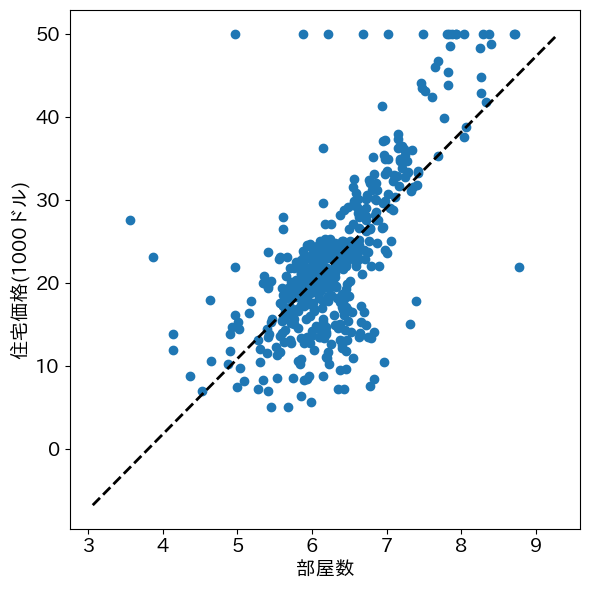

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 説明変数。データフレームから名前RMの列を取り出し、変数xに代入
x = df['RM']
# 分析用に、配列を(データ数, 成分数)の形状に変形
x = x.to_numpy().reshape(-1, 1)

# 目的変数。データフレームから名前PRICEの列を取り出し、変数y_trueに代入
y_true = df['PRICE']
y_true = y_true.to_numpy()

# 単回帰分析クラスのインスタンス生成
model=LinearRegression()

# 回帰の実行。パラメータ推定。説明変数x、目的変数y_true
model.fit(x, y_true)

w1=model.coef_      # modelが持つ傾きの値をw1に代入
w0=model.intercept_ # modelが持つ切片の値をw0に代入
print('w1(傾き):', w1)
print('w0(切片):', w0)

# 説明変数に対する予測値を計算
y_pred = model.predict(x)

# 平均二乗誤差(mean squared error)を計算する
mse=mean_squared_error(y_true, y_pred)
print('MSE:', mse)

# 決定係数の計算
R2 = r2_score(y_true, y_pred)
print('決定係数R2:', R2)

# 相関関係の計算。xを1次元配列に戻して計算
comat=np.corrcoef(x.flatten(), y_true)
print('相関関数:', comat[0, 1])

# 回帰分析の結果を可視化
# 説明変数、目的変数、モデル、リスト[説明変数の列名、目的変数の列名]
show_data2d(x, y_true, model,labels=['部屋数', '住宅価格(1000ドル)'] )

# 実習6.4：部屋数を説明変数、価格を目的変数にしてRANSACによる単回帰分析

w0: -44.08906428639813
w1: 10.734508808479278
MSE: 5.999537652704029
決定係数R2: 0.8860423919744118
相関関数: 0.9412982481522068


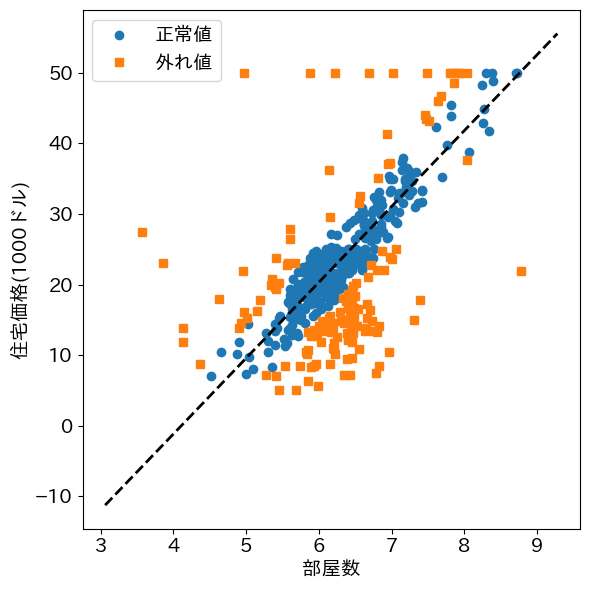

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RANSACRegressor
import numpy as np
import random

random.seed(0) # 乱数シードの固定
np.random.seed(0) # 乱数シードの固定

# 説明変数。データフレームから名前RMの列を取り出し、変数xに代入
x = df['RM']
# 分析用に、配列を(データ数, 成分数)の形状に変形
x = x.to_numpy().reshape(-1, 1)

# 目的変数。データフレームから名前PRICEの列を取り出し、変数y_trueに代入
y_true = df['PRICE']
y_true = y_true.to_numpy()

# RANSACインスタンス生成
ransac=RANSACRegressor(LinearRegression(),    # 線形回帰インスタンスを指定
                       max_trials=100,         # 最大試行回数
                       min_samples=50,         # ランダムに選択するデータの最小値
                       loss='absolute_error',  # 目的変数の値と予測値の距離を絶対値で測る#
                       residual_threshold=5.0, # 許容距離
                       random_state=0)         # 乱数シード

# RANSAC実行
ransac.fit(x, y_true)

w1=ransac.estimator_.coef_[0]  # 回帰係数を取り出す
w0=ransac.estimator_.intercept_ # 切片を取り出す

print('w0:', w0)
print('w1:', w1)

# 正常値のみで予測値を計算するため、正常値を取り出す
# 目的変数の各要素が正常値か否かを表す真偽値の配列
inlier_mask = ransac.inlier_mask_
# ファンシーインデックスにより正常値の説明変数を取り出す。分析用に形状を変更
x_inner = x[inlier_mask].reshape(-1, 1)

# 正常値のみで予測値を計算
y_pred = ransac.predict(x_inner)

# ファンシーインデックスにより正常値の目的変数を取り出す
y_true_inner = y_true[inlier_mask]


# 正常値のみで予測値を計算
# 目的変数の値と予測値との平均二乗誤差を計算
mse=mean_squared_error(y_true_inner, y_pred)
print('MSE:', mse)

# 決定係数の計算
R2 = r2_score(y_true_inner, y_pred)
print('決定係数R2:', R2)

# 相関関係の計算。x_innerを1次元配列に戻して計算
comat=np.corrcoef(x_inner.flatten(), y_true_inner)
print('相関関数:', comat[0, 1])

# RANSAC分析の結果を可視化
# 説明変数、目的変数、モデル、リスト[説明変数の列名、目的変数の列名]
show_ransac_result(x, y_true, ransac,labels=['部屋数', '住宅価格(1000ドル)'])

# 実習6.5：RANSACによる多項式回帰

***DMCODE 1699585884.40814
MSE: 6.248342129269333
決定係数R2: 0.8239407710422546


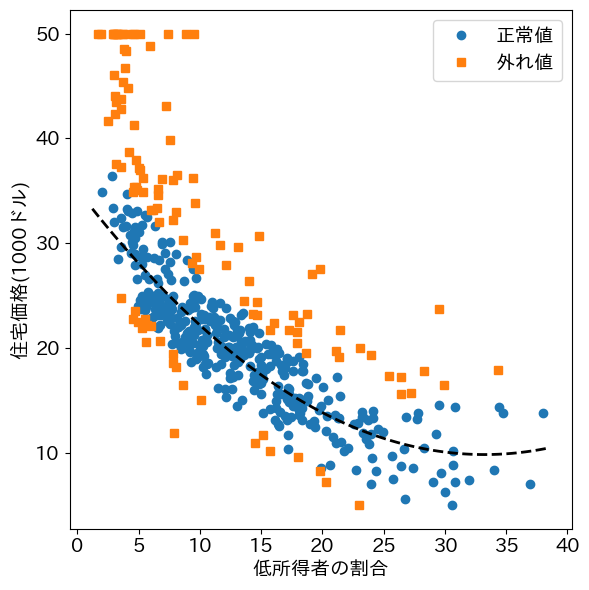

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RANSACRegressor
import numpy as np
import random
dmcode()

random.seed(0) # 乱数シードの固定
np.random.seed(0) # 乱数シードの固定

# 以降に必要なコードを記述すること
# 説明変数。データフレームから名前RMの列を取り出し、変数xに代入
x = df['LSTAT']
# 分析用に、配列を(データ数, 成分数)の形状に変形
x = x.to_numpy().reshape(-1, 1)

# 目的変数。データフレームから名前PRICEの列を取り出し、変数y_trueに代入
y_true = df['PRICE']
y_true = y_true.to_numpy()





x2 = prepare_data(x, degree=2)




# RANSACインスタンス生成
ransac=RANSACRegressor(LinearRegression(),    # 線形回帰インスタンスを指定
                       max_trials=100,         # 最大試行回数
                       min_samples=50,         # ランダムに選択するデータの最小値
                       loss='absolute_error',  # 目的変数の値と予測値の距離を絶対値で測る
                       residual_threshold=5.0, # 許容距離
                       random_state=0)         # 乱数シード

# RANSAC実行
ransac.fit(x2, y_true)

w1=ransac.estimator_.coef_[0]  # 回帰係数を取り出す
w0=ransac.estimator_.intercept_ # 切片を取り出す


# 正常値のみで予測値を計算するため、正常値を取り出す
# 目的変数の各要素が正常値か否かを表す真偽値の配列
inlier_mask = ransac.inlier_mask_
# ファンシーインデックスにより正常値の説明変数を取り出す。分析用に形状を変更
x_inner = x2[inlier_mask].reshape(-1, 2)
# 正常値のみで予測値を計算
y_pred = ransac.predict(x_inner)
# ファンシーインデックスにより正常値の目的変数を取り出す
y_true_inner = y_true[inlier_mask]


# 正常値のみで予測値を計算
# 目的変数の値と予測値との平均二乗誤差を計算
mse=mean_squared_error(y_true_inner, y_pred)
print('MSE:', mse)

# 決定係数の計算
R2 = r2_score(y_true_inner, y_pred)
print('決定係数R2:', R2)


# RANSAC分析の結果を可視化
# 説明変数、目的変数、モデル、リスト[説明変数の列名、目的変数の列名]
show_ransac_result(x2, y_true, ransac,labels=['低所得者の割合', '住宅価格(1000ドル)'])

# 実習6.6：国別の乳児死亡率とGDPに対する回帰分析

In [ ]:
dmcode()

# 以降に必要なインポート文やコードを記述すること

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RANSACRegressor
import numpy as np
import random
import pandas as pd

# データセットをファイルdm6.csvから、変数dfへ読み込む
df = pd.read_csv('dm6-2.csv', encoding='utf-8')

random.seed(0) # 乱数シードの固定
np.random.seed(0) # 乱数シードの固定

# 説明変数。変数xに代入
x = df['GDP']
# 分析用に、配列を(データ数, 成分数)の形状に変形
x = x.to_numpy().reshape(-1, 1)

# 目的変数。変数y_trueに代入
y_true = df['乳児死亡率']
y_true = y_true.to_numpy()
x2=np.log10(x)
y2=np.log10(y_true)

# RANSACインスタンス生成
ransac=RANSACRegressor(LinearRegression(),    # 線形回帰インスタンスを指定
                       max_trials=100,         # 最大試行回数
                       min_samples=50,         # ランダムに選択するデータの最小値
                       loss='absolute_error',  # 目的変数の値と予測値の距離を絶対値で測る#
                       residual_threshold=5.0, # 許容距離
                       random_state=0)         # 乱数シード

# RANSAC実行
ransac.fit(x2, y2)

w1=ransac.estimator_.coef_[0]  # 回帰係数を取り出す
w0=ransac.estimator_.intercept_ # 切片を取り出す

print('傾き:', w1)
print('切片:', w0)

# 正常値のみで予測値を計算するため、正常値を取り出す
# 目的変数の各要素が正常値か否かを表す真偽値の配列
inlier_mask = ransac.inlier_mask_
# ファンシーインデックスにより正常値の説明変数を取り出す。分析用に形状を変更
x_inner = x2[inlier_mask].reshape(-1, 1)

# 正常値のみで予測値を計算
y_pred = ransac.predict(x_inner)

# ファンシーインデックスにより正常値の目的変数を取り出す
y_true_inner = y2[inlier_mask]

# 相関関係の計算。x_innerを1次元配列に戻して計算
comat=np.corrcoef(x_inner.flatten(), y_true_inner)
print('相関関数:', comat[0, 1])

# 決定係数の計算
R2 = r2_score(y_true_inner, y_pred)
print('決定係数R2:', R2)

***DMCODE 1699586042.28979
傾き: -0.4932026176396494
切片: 3.05969183105859
相関関数: -0.8097170640637076
決定係数R2: 0.6556417238359503


# 分析結果についての考察を記述する

1.回帰直線の傾きはマイナスなので、未知のGDPの値が減少すると乳児死亡率の値は増加し、GDPの値が増加すると乳児死亡率の値は減少すると予測できる。

2.相関関数はマイナス0.8くらいなので強い負の相関関係があり、GDPの値が増加すると乳児死亡率の値は減少し、GDPの値が減少すると乳児死亡率の値は増加するといえる。

3.決定係数は1に近づく程、目的変数に対して予測値の直線モデルの当てはまりがいいので、当てはまりはやや良いといえる。

4.GDPが高い程乳児死亡率が低く、GDPが低い程乳児死亡率が高い傾向があるという因果関係があるといえる。